# SECTION 1: Introduction to Conjoint Analysis

## 1. What is Conjoint Analysis?

Conjoint analysis is a statistical technique used in market research to understand how people value different features that make up an individual product or service.

> It's like asking: "What matters most to you when choosing a product or service?"

By presenting potential customers with a set of products or services (each with varying features), researchers can determine which features are most important and how changes in these features influence consumer preferences and decision-making.

It enables companies to undestand how various attributes of a product or service contribute to the consumer's decision-making process. This analytical approach is particularly beneficial for _designing new products, pricing strategies, and feature prioritization_.

__Simple Example:__

Imagine you want to buy a new TV. Different TVs have various features like  screen size, brand, price etc. Conjoint analysis helps companies understand which of these features are most important to you and how much you are willing to pay for each feature.

Here are some examples of the combinations they might present:

<img src="conjoint_profiles.png">

Image source: [Geopoll](https://www.geopoll.com/blog/conjoint-analysis-in-market-research/)


Respondents choose their preferred option, and we repeat this process with different combinations. By analyzing their choices, we can determine:

1. Which features are most important (e.g., strength of coffee)
2. How much each feature contributes to their decision (e.g., price sensitivity)
3. Optimal product configurations (e.g., strong coffee, medium size, medium price)

Conjoint analysis helps businesses create products or services that meet customer needs and preferences, increasing the likelihood of success!

<br><br><br><br>



## 2. Key Components of Conjoint Analysis:



**1. Attributes and Levels**: Attributes are the features or characteristics of a product, while levels are the different variations of each attribute. For example, in a smartphone, 'battery life' could be an attribute, with levels like '12 hours', '18 hours', and '24 hours'.

**2. Profiles or Concepts**: These are the product descriptions created by combining different levels of attributes. In a survey, respondents are shown these profiles and asked to rate or choose them.

**3. Utility Scores**: The analysis provides utility scores for each level of each attribute, indicating how much each level is preferred over others.

## 3. Smartphone Profiles - Code Along

Example Scenario: Smartphone Conjoint Analysis.

Let's consider a simplified example of conjoint analysis for a smartphone market study. We have three attributes: Battery Life (12, 18, 24 hours), Screen Size (5.5, 6, 6.5 inches), and Price (`$300, $400, $500`).

__Step 1:__ Design the Study
First, we define our attributes and levels. Then, we create a set of hypothetical smartphone profiles combining these attributes.

__Step 2:__ Collect Data
We would then survey a group of potential customers, showing them these smartphone profiles and asking them to rate or choose their preferred options.

__Step 3:__ Analyze the Data
Finally, we analyze this data to understand the preference patterns. Higher utility scores for an attribute level indicate a higher preference.

__Python Implementation with a Sample Dataset__

Now, let's dive into a practical example using Python. We'll use a sample dataset that mimics the responses from a conjoint analysis survey.

Setting Up the Environment
First, ensure you have the necessary libraries installed:

In [1]:
!pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18170 sha256=55d7314c8a894f9a060c8a51a80ecf668f34ba81084c5304219583e572ac0652
  Stored in directory: /root/.cache/pip/wheels/84/20/8c/8bd43ba42b0b6d39ace1219d6da1576e0dac81b12265c4762e
Successfully built pyDOE


Generating a Sample Dataset
We'll use pyDOE to create a design matrix for our conjoint study:

In [2]:
import pandas as pd
from pyDOE import lhs
from statsmodels.formula.api import ols

# Define the levels for each attribute
battery_life_levels = [12, 18, 24]
screen_size_levels = [5.5, 6, 6.5]
price_levels = [300, 400, 500]

# Create a fractional factorial design matrix
design = lhs(3, samples=9)

In [3]:
design

array([[0.28265427, 0.50893804, 0.1108015 ],
       [0.15579804, 0.43520356, 0.32268848],
       [0.59693728, 0.76857289, 0.36491103],
       [0.10814666, 0.08909317, 0.52248723],
       [0.91577878, 0.85836008, 0.11313222],
       [0.54040273, 0.18996254, 0.86459116],
       [0.81152862, 0.58280821, 0.7101325 ],
       [0.37482376, 0.97627993, 0.66023966],
       [0.75342078, 0.25434065, 0.89239789]])

In [4]:
design[:, 0] = [battery_life_levels[int(i)] for i in design[:, 0]*3]
design[:, 1] = [screen_size_levels[int(i)] for i in design[:, 1]*3]
design[:, 2] = [price_levels[int(i)] for i in design[:, 2]*3]

# Convert to a DataFrame
df = pd.DataFrame(design, columns=['Battery_Life', 'Screen_Size', 'Price'])
print(df)


   Battery_Life  Screen_Size  Price
0          12.0          6.0  300.0
1          12.0          6.0  300.0
2          18.0          6.5  400.0
3          12.0          5.5  400.0
4          24.0          6.5  300.0
5          18.0          5.5  500.0
6          24.0          6.0  500.0
7          18.0          6.5  400.0
8          24.0          5.5  500.0


Simulating Responses
For demonstration, we'll simulate some responses:

Simulating some random ratings in this case, __usually this would represent the actual customer preferences__!

In [5]:
import numpy as np

# Simulating random ratings
np.random.seed(0)
df['Rating'] = np.random.randint(1, 6, df.shape[0])
print(df)


   Battery_Life  Screen_Size  Price  Rating
0          12.0          6.0  300.0       5
1          12.0          6.0  300.0       1
2          18.0          6.5  400.0       4
3          12.0          5.5  400.0       4
4          24.0          6.5  300.0       4
5          18.0          5.5  500.0       2
6          24.0          6.0  500.0       4
7          18.0          6.5  400.0       3
8          24.0          5.5  500.0       5


Performing Conjoint Analysis
Now, we perform the conjoint analysis using regression:

(The result can change when you reproduce it because of the randomness of the input ratings.)

In [6]:
model = ols('Rating ~ C(Battery_Life) + C(Screen_Size) + C(Price)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                 -0.724
Method:                 Least Squares   F-statistic:                    0.3281
Date:                Thu, 31 Jul 2025   Prob (F-statistic):              0.869
Time:                        17:48:47   Log-Likelihood:                -12.867
No. Observations:                   9   AIC:                             37.73
Df Residuals:                       3   BIC:                             38.92
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## 4. Interpreting the Results
The output of the model summary will show the utility scores for each level of each attribute. Higher coefficients indicate higher preference.

Intercept                  3.027778
C(Battery_Life)[T.18.0]   -0.958333
C(Battery_Life)[T.24.0]    1.208333
C(Screen_Size)[T.6.0]     -0.166667
C(Screen_Size)[T.6.5]      0.041667
C(Price)[T.400.0]          1.250000
C(Price)[T.500.0]          0.208333
dtype: float64


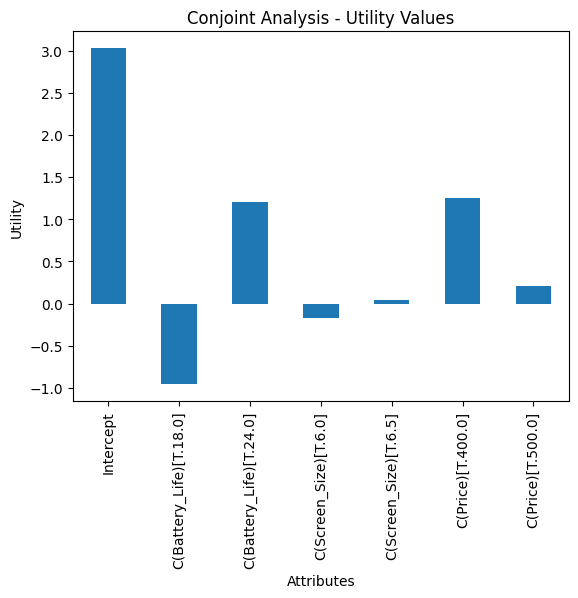

In [7]:
# Step 3: Extract Parameters
coefficients = model.params
print(coefficients)

import matplotlib.pyplot as plt
# Step 4: Plot Utilities
coefficients.plot(kind='bar')
plt.title('Conjoint Analysis - Utility Values')
plt.xlabel('Attributes')
plt.ylabel('Utility')
plt.xticks(rotation=90)
plt.show()

## 5. Expanded version - Code Along

For this demonstration, let's assume we are analyzing a product with three attributes: color, size, and price. Each attribute has three levels:

Color: Red, Blue, Green
Size: Small, Medium, Large
Price: Low, Medium, High

Now, let's simulate the data and perform the conjoint analysis. We will begin by defining the attributes and levels, creating the experimental design, and simulating responses. Let's start the coding process.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define the attributes and levels
attributes = {
    'Color': ['Red', 'Blue', 'Green'],
    'Size': ['Small', 'Medium', 'Large'],
    'Price': ['Low', 'Medium', 'High']
}

# Generate all possible combinations of attributes (full factorial design)
design = pd.DataFrame(list(product(*attributes.values())), columns=attributes.keys())
design


,Color,Size,Price
0,Red,Small,Low
1,Red,Small,Medium
2,Red,Small,High
3,Red,Medium,Low
4,Red,Medium,Medium
5,Red,Medium,High
6,Red,Large,Low
7,Red,Large,Medium
8,Red,Large,High
9,Blue,Small,Low


__Simulate responses from 1000 people.__

In [9]:
# Simulate responses from 1000 people
np.random.seed(0) # for reproducibility
num_respondents = 1000
respondent_choices = []

for _ in range(num_respondents):
    # Each respondent randomly chooses a profile
    chosen_index = np.random.choice(design.index)
    respondent_choices.append(design.iloc[chosen_index])

# Store as Data Frame
chosen_profiles = pd.DataFrame(respondent_choices).reset_index(drop=True)
chosen_profiles

,Color,Size,Price
0,Blue,Medium,Low
1,Blue,Large,Low
2,Green,Medium,Low
3,Red,Small,Low
4,Red,Medium,Low
...,...,...,...
995,Red,Large,Medium
996,Green,Medium,Medium
997,Red,Small,High
998,Green,Medium,Medium


In [10]:
# Encode the categorical data for regression analysis
design_encoded = pd.get_dummies(design, drop_first=True)
chosen_profiles_encoded = pd.get_dummies(chosen_profiles, drop_first=True)
chosen_profiles_encoded.head()

,Color_Green,Color_Red,Size_Medium,Size_Small,Price_Low,Price_Medium
0,False,False,True,False,True,False
1,False,False,False,False,True,False
2,True,False,True,False,True,False
3,False,True,False,True,True,False
4,False,True,True,False,True,False


In [11]:
# Generate a random utility for each respondent
np.random.seed(0)
respondent_utility = np.random.normal(loc=0, scale=1, size=num_respondents)
respondent_utility   # a customer rated the profile higher or is willing to pay more for that profile.

array([ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01,  2.24089320e+00,
        1.86755799e+00, -9.77277880e-01,  9.50088418e-01, -1.51357208e-01,
       -1.03218852e-01,  4.10598502e-01,  1.44043571e-01,  1.45427351e+00,
        7.61037725e-01,  1.21675016e-01,  4.43863233e-01,  3.33674327e-01,
        1.49407907e+00, -2.05158264e-01,  3.13067702e-01, -8.54095739e-01,
       -2.55298982e+00,  6.53618595e-01,  8.64436199e-01, -7.42165020e-01,
        2.26975462e+00, -1.45436567e+00,  4.57585173e-02, -1.87183850e-01,
        1.53277921e+00,  1.46935877e+00,  1.54947426e-01,  3.78162520e-01,
       -8.87785748e-01, -1.98079647e+00, -3.47912149e-01,  1.56348969e-01,
        1.23029068e+00,  1.20237985e+00, -3.87326817e-01, -3.02302751e-01,
       -1.04855297e+00, -1.42001794e+00, -1.70627019e+00,  1.95077540e+00,
       -5.09652182e-01, -4.38074302e-01, -1.25279536e+00,  7.77490356e-01,
       -1.61389785e+00, -2.12740280e-01, -8.95466561e-01,  3.86902498e-01,
       -5.10805138e-01, -

In [12]:
chosen_profiles_encoded

,Color_Green,Color_Red,Size_Medium,Size_Small,Price_Low,Price_Medium
0,False,False,True,False,True,False
1,False,False,False,False,True,False
2,True,False,True,False,True,False
3,False,True,False,True,True,False
4,False,True,True,False,True,False
...,...,...,...,...,...,...
995,False,True,False,False,False,True
996,True,False,True,False,False,True
997,False,True,False,True,False,False
998,True,False,True,False,False,True


In [13]:
# Perform linear regression to estimate utilities
X_train, X_test, y_train, y_test = train_test_split(chosen_profiles_encoded,
                                                    respondent_utility,
                                                    test_size=0.2,
                                                    random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

# Estimated part-worths
part_worths = model.coef_

# Attributes and their part-worths
attributes_part_worths = dict(zip(chosen_profiles_encoded.columns, part_worths))

attributes_part_worths


{'Color_Green': np.float64(-0.096654808893472),
 'Color_Red': np.float64(-0.10764207773300583),
 'Size_Medium': np.float64(0.1025497848552198),
 'Size_Small': np.float64(-0.05672072857088159),
 'Price_Low': np.float64(-0.04410750156573064),
 'Price_Medium': np.float64(-0.07872648862923307)}

The conjoint analysis model has estimated part-worth utilities for each level of the attributes based on the simulated data. The estimated part-worths are as follows:

- Color
    - Green: -0.097
    - Red: -0.108

- Size
    - Medium: 0.103
    - Small: -0.057
    
- Price
    - Low: -0.044
    - Medium: -0.079
    
These values represent the utility (or preference) associated with each attribute level. A higher part-worth indicates a higher preference for that attribute level. For instance, 'Size_Medium' has a positive part-worth, indicating a preference for medium size over the base level (which is 'Large' in this case).



## 6. __Relative Importance of Each Attribute__

We will look at the spread of the coefficient values to understand the role it has played in customer preferences. Attribute having a wide range of coefficient values, tend to have more say in customer's choice.

If the coefficient value was small / less variation, then it does not impact the customer choice much.

In [14]:
# Calculating the relative importance of each attribute

# Split the attributes and their part-worths
part_worths_split = {
    'Color': [attributes_part_worths.get('Color_Green', 0), attributes_part_worths.get('Color_Red', 0)],
    'Size': [attributes_part_worths.get('Size_Medium', 0), attributes_part_worths.get('Size_Small', 0)],
    'Price': [attributes_part_worths.get('Price_Low', 0), attributes_part_worths.get('Price_Medium', 0)]
}

# Calculate the range of part-worths for each attribute
ranges = {attribute: max(values) - min(values) for attribute, values in part_worths_split.items()}

# Total range across all attributes
total_range = sum(ranges.values())

# Relative importance for each attribute
relative_importance = {attribute: (range_ / total_range) * 100 for attribute, range_ in ranges.items()}

relative_importance

{'Color': np.float64(5.362867091037839),
 'Size': np.float64(77.73966465189174),
 'Price': np.float64(16.89746825707042)}

Next, We will calculate the relative importance of each attribute. The relative importance is derived from the range of part-worths within each attribute. This shows which attributes have the most impact on the respondents' choices. Following that, we will proceed to visualize the data and interpret the results. Let's calculate the relative importance.

The relative importance of each attribute in the conjoint analysis is as follows:

- Color: 5.36%
- Size: 77.74%
- Price: 16.90%

These percentages indicate the impact of each attribute on the respondents' overall utility. In this simulation, 'Size' is the most important attribute, having the greatest influence on preferences, followed by 'Price', and then 'Color'.

Now, let's move on to the data visualization part. We will create:

1. **Part-Worth Utility Plots** for each attribute to visualize the utilities of each level.
2. **Relative Importance Plot** to show the importance of each attribute in a visual format.

In our example, the actual values of the plots doesnt mean much, because, the customer preferences were generated at random. However, the coefficient values help understand the preferences a lot.

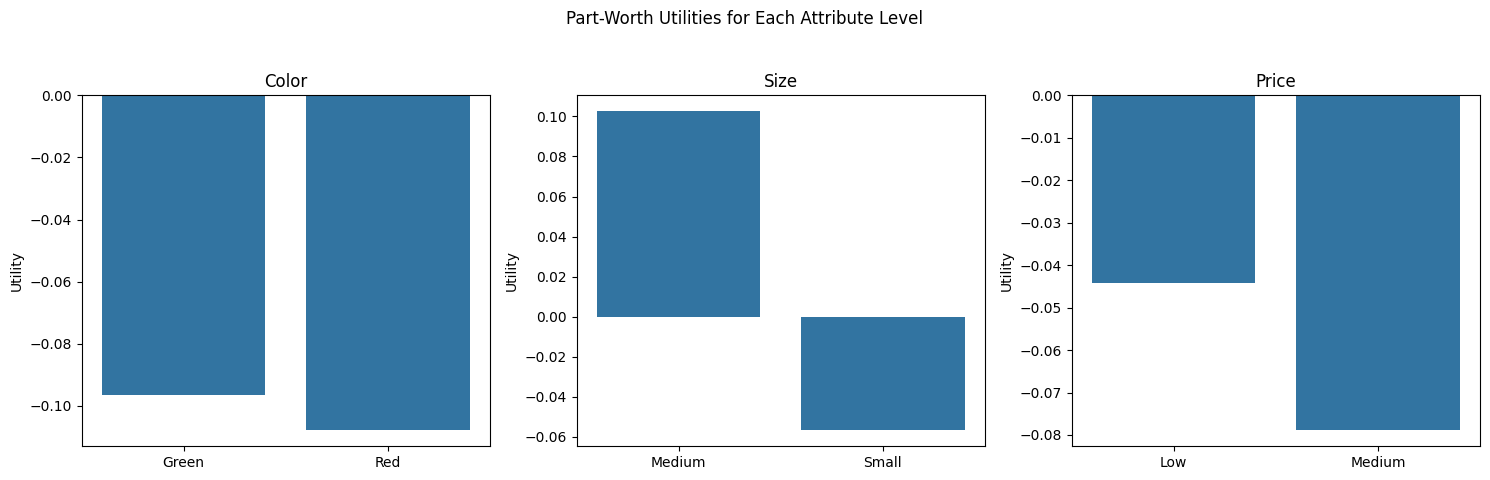

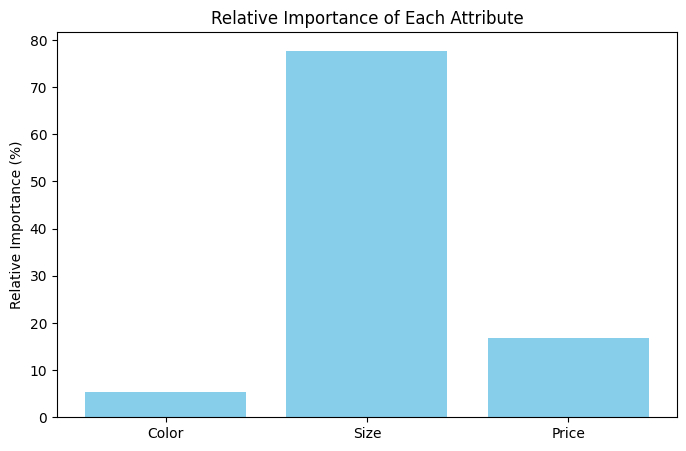

In [15]:
# Part-Worth Utility Plots for each attribute

# Setting up the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Part-Worth Utilities for Each Attribute Level')

# Colors
sns.barplot(ax=axes[0], x=['Green', 'Red'], y=part_worths_split['Color'])
axes[0].set_title('Color')
axes[0].set_ylabel('Utility')

# Sizes
sns.barplot(ax=axes[1], x=['Medium', 'Small'], y=part_worths_split['Size'])
axes[1].set_title('Size')
axes[1].set_ylabel('Utility')

# Prices
sns.barplot(ax=axes[2], x=['Low', 'Medium'], y=part_worths_split['Price'])
axes[2].set_title('Price')
axes[2].set_ylabel('Utility')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Relative Importance Plot
plt.figure(figsize=(8, 5))
plt.bar(relative_importance.keys(), relative_importance.values(), color='skyblue')
plt.title('Relative Importance of Each Attribute')
plt.ylabel('Relative Importance (%)')
plt.show()

The visualizations provide insights into the conjoint analysis results:

**1. Part-Worth Utility Plots**:

- Color: Shows the utilities for the 'Green' and 'Red' levels, compared to the baseline 'Blue'. Both 'Green' and 'Red' have negative utilities, indicating a lower preference compared to 'Blue'.

- Size: 'Medium' has a positive utility, indicating a preference over the baseline 'Large', while 'Small' has a negative utility.

- Price: Both 'Low' and 'Medium' price levels have negative utilities compared to the baseline 'High', suggesting a preference for higher-priced options in this simulation.

**2. Relative Importance Plot**:

- This plot demonstrates that 'Size' is the most influential attribute in determining preferences, followed by 'Price', and then 'Color'. 'Size' has a significantly higher impact on choices than the other attributes.

### Evaluation Metrics and Interpretation

The primary evaluation metric for this model is the R-squared value, which measures how well the observed outcomes are replicated by the model. Higher R-squared values indicate a better fit. Let's calculate the R-squared value for the test data to evaluate the model's performance.

In [16]:
# Evaluate the model
r_squared = model.score(X_test, y_test)

# Model's R-squared value
r_squared

0.009380367896207331

The R-squared value of the model is approximately 0.009. This value is quite low, indicating that the model does not explain a significant portion of the variance in the utility scores. This could be due to several factors, such as the simplicity of the simulated data, the randomness in generating utility scores, or the limited number of attributes and levels considered.

## Key Takeaways and Further Steps:

- **Model Performance**: The low R-squared suggests that the model's predictive power is limited. In a real-world scenario, more complex models and richer datasets could provide better insights.

- **Utility and Importance**: Despite the model's low R-squared, we obtained meaningful utility values and relative importance scores. These offer insights into how different attribute levels are valued relative to each other.

- **Further Analysis**: In a real setting, additional steps like including interaction terms, testing different models, or using more sophisticated conjoint analysis methods (like choice-based conjoint) might be necessary for a more robust analysis.

Remember, the results here are based on a simulated dataset. In actual market research, the quality and nature of the data, along with the complexity of the model, play crucial roles in deriving actionable insights from conjoint analysis.

## Conclusion
Conjoint analysis is a vital tool in understanding customer preferences and making informed product decisions. By simulating different market scenarios, companies can better align their products with consumer needs. Python, with its robust statistical libraries, offers a practical and efficient way to perform conjoint analysis, making it an invaluable skill for market researchers and data analysts alike.